**One-shot learning** is an object categorization method where unlike traditional machine learning and deep learning methods where they use hundreds or thousands of samples/images and very large datasets, one-shot learning uses 'one or few samples/ images to categorize the images.
Hence the name one-shot learning.

In this project i have applied 'Siamese neural network' and other simpler models on 'Omniglot dataset' to see how they perform.. 

In [ ]:
!pip install opencv-python

In [ ]:
!pip install --upgrade scikit-image==0.14.2 --user

In [ ]:
!pip install dill==0.2.7.1

In [8]:
import os
import imageio
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
import numpy.random as rng
import numpy as np
import os
import dill as pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import cv2
import time

In [10]:
import re
import numpy as np
from PIL import Image

from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from keras.optimizers import RMSprop

C:\Users\Roy Achmad Aziz\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


OMNIGLOT DATA SET
Description: The Omniglot dataset contains over 1600 handwritten characters from 50 different alphabets. It's used for studying one-shot learning and for developing more human-like learning algorithms.

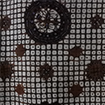

In [11]:
Image.open("data_training/Yogyakarta/character01_Grising/001.png")

In [12]:
# convert image to numpy array
def load_image(infilename ) :
  img = Image.open( infilename )
  img.load()
  data = np.asarray( img, dtype="int32" )
  return data

In [13]:
img = load_image("data_training/Yogyakarta/character07_Tambal/001.png")
img.shape
#print(img)

(105, 105, 3)

In [14]:
def get_pairs(list):
 return zip(range(len(list)), list)

In [15]:
from skimage import data
def get_batik(path):
    batik_names = os.listdir(path)
    batik_names.sort()
    batik_dict = {}
    batik_dict['names'] = batik_names
    batik_dict['sizes'] = []
    
    for batik_name in batik_names: 
        batik_path = os.path.join(path, batik_name)
        batik = {}
        batik_dict[batik_name] = batik
        batik['name'] = batik_name
        char_names = os.listdir(batik_path)
        char_names.sort()
        batik_size = len(char_names)
        batik['size'] = batik_size
        batik_dict['sizes'].append(batik_size)
        
        for char_idx, char_name in get_pairs(char_names):
            char_path = os.path.join(batik_path, char_name)
            example_names = os.listdir(char_path)
            example_names.sort()
            
            for example_idx, example_name in get_pairs(example_names):
                image_path = os.path.join(char_path, example_name)
#                 image = imageio.imread(image_path)
                image = data.imread(image_path, as_gray=True )
                image.reshape(105,105,1)
                print(image.shape)
                batik[(char_idx, example_idx)] = 255 - image
                
    return batik_dict

In [16]:
train_path = 'Data_training'
train_data = get_batik(train_path)

val_path = 'Data_testing'
val_data = get_batik(val_path)

(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)
(105, 105)

In [24]:
'''list of all the names of languages in the training(images_background) data'''
train_data['names']

['Yogyakarta', 'Yogyakarta _Solo']

In [25]:
'''list of all the names of languages in the validation(images_evaluation) data'''
val_data['names']

['Yogyakarta', 'Yogyakarta _Solo']

In [26]:
# displaying all the alphabets of a language
def display_batiks(batik, example_idx=0):
    table_size = math.ceil(math.sqrt(batik['size']))
    plt.figure(figsize=(10, 10))
    for char_idx in range(batik['size']):
            plt.subplot(table_size, table_size, char_idx + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(batik[(char_idx, example_idx)], cmap='gray_r')
    plt.show()

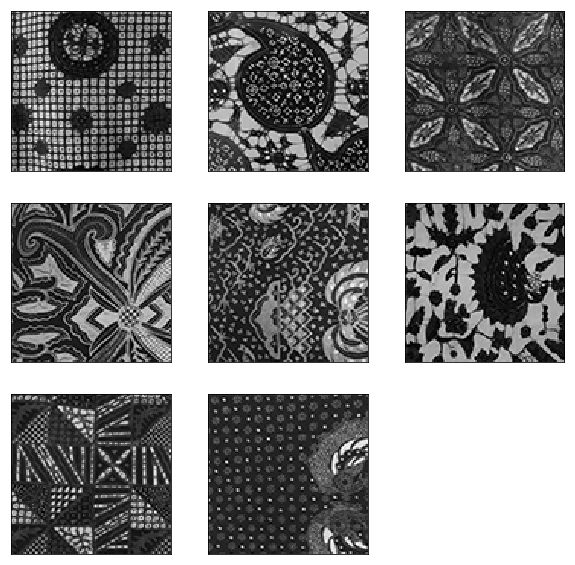

In [31]:
# alphabets of Futurama - first image from each character of each alphabet of the language
display_batiks(train_data['Yogyakarta'])

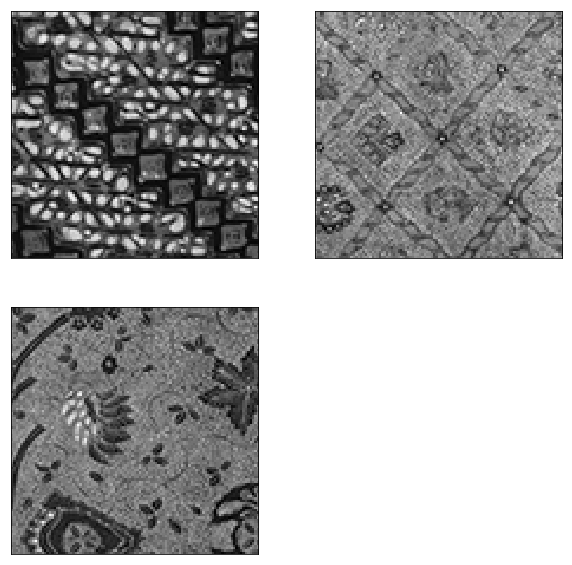

In [34]:
# alphabets of Greek - first image from each character of each alphabet of the language
display_batiks(train_data['Yogyakarta _Solo'])

In [36]:
def get_batch(data, batch_size):
  total_size = sum(data['sizes'])
  prob = [size / total_size for size in data['sizes']]
  
  left_input = np.zeros((batch_size, 105, 105, 1))
  right_input = np.zeros((batch_size, 105, 105, 1))
  output = np.zeros((batch_size,))
  
  for idx in np.arange(batch_size):
    # select random alphabet with prob 
    #   (its number of characters / total number of characters)
    left_batik_name = np.random.choice(data['names'], p=prob)
    # select random character
    left_character_idx = np.random.randint(low = 0, high = data[left_batik_name]['size'])

    if np.random.uniform() < 0.5: 
      similarity = 1.0
      right_batik_name = left_batik_name
      right_character_idx = left_character_idx
    else:
      similarity = 0.0
      while True:
        # select random alphabet
        right_batik_name = np.random.choice(data['names'], p=prob)
        # select random character
        right_character_idx = np.random.randint(low = 0, high = data[right_batik_name]['size'])
        if left_batik_name != right_batik_name or left_character_idx != right_character_idx:
          break

    # select random example
    left_example_idx = np.random.randint(low = 0, high = 11) 
    # select random example
    right_example_idx = np.random.randint(low = 0, high = 11)
    
    left_input[idx, :, :, :] = data[left_batik_name][(left_character_idx, left_example_idx)].reshape((105, 105, 1))
    right_input[idx, :, :, :] = data[right_batik_name][(right_character_idx, right_example_idx)].reshape((105, 105, 1))
    output[idx] = similarity
    
  return [left_input, right_input], output

In [37]:
def pair_generator(data, batch_size):
  while True:
    yield get_batch(data, batch_size)

In [38]:
import random
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input, Lambda, Conv2D
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt

i want to build 3 different models and compare their model accuracies and select the best model with the highest accuracy to do one shot classification.

----------------------------------------------------------------------------------------------------------------

for the 1st model instead of passing a pair of images through a CNN and extracting their feature vector and comparing  them .
i simple wanted to see how a model performs when if we just flatten the entire image.
im pretty sure that model does not do well , lets see





In [19]:
'''
we build a simple model where we flatten the images(105 X 105) and calculate the similarity 
between the vectors.
'''

def simple_model(input_shape):
    input = Input((105,105, 1))
    x = Flatten()(input)
    #x = Dense(128, activation = 'relu')(x)
    dense = Model(input, x)
    
    input1 = Input(input_shape)
    input2 = Input(input_shape)
    
    dense1 = dense(input1)
    dense2 = dense(input2)
    
    L1_dist = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    merge_layer = L1_dist([dense1, dense2])
    dense_layer = Dense(1, activation = 'sigmoid')(merge_layer)
    basic_model = Model(inputs = [input1, input2], outputs = dense_layer)
    
    return basic_model

In [20]:
model = simple_model((105,105,1)) 
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 11025)        0           input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 11025)        0           model_1[1][0]              

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
history_1 = model.fit_generator(pair_generator(train_data, 32), steps_per_epoch=200, epochs=50)


Epoch 1/50
200/200 [==============================] - 3s 16ms/step - loss: 0.6297 - accuracy: 0.6647
Epoch 2/50
200/200 [==============================] - 3s 15ms/step - loss: 0.5007 - accuracy: 0.8036
Epoch 3/50
200/200 [==============================] - 3s 15ms/step - loss: 0.4137 - accuracy: 0.8864
Epoch 4/50
200/200 [==============================] - 3s 15ms/step - loss: 0.3514 - accuracy: 0.9183
Epoch 5/50
200/200 [==============================] - 3s 15ms/step - loss: 0.3022 - accuracy: 0.9480
Epoch 6/50
200/200 [==============================] - 3s 17ms/step - loss: 0.2721 - accuracy: 0.9581
Epoch 7/50
200/200 [==============================] - 3s 16ms/step - loss: 0.2511 - accuracy: 0.9578
Epoch 8/50
200/200 [==============================] - 3s 15ms/step - loss: 0.2159 - accuracy: 0.9761
Epoch 9/50
200/200 [==============================] - 3s 17ms/step - loss: 0.1965 - accuracy: 0.9812
Epoch 10/50
200/200 [==============================] - 3s 16ms/step - loss: 0.1756 - accur

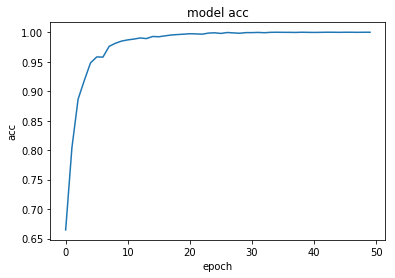

In [23]:
plt.plot(history_1.history['accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()


as predicted the model did not do well , the reason is simple when we pass an image through a CNN model in the last layer before flatten the CNN extracts key features that defines the image for example if we pass an image of a cat through a trained CNN in the last layer the model extracts key features of cat the defines it like "whiskers" or "pointy ears" which helps the model to identity the image.
but in the above model we simply flattened the entire image that defeats the whole purpose..

For the 2nd model I build a simple 2 layered CNN nothing specific, i went through keras functional API  and found a sample code for shared vision problem (https://keras.io/getting-started/functional-api-guide/) and used that model architecture to see how it performs when we add CONVOLUTION.

ofc i will be using the same method as before but instead of flatten the entire image , here the image passes through a couple of CNN layers and the extracted feature vectors and flatten and their abs difference is fully connected to a dense layer of unit one and activation sigmoid..

In [ ]:
 def cnn_model(input_shape):
    
    # tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # conv
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    
    
    # encodings (feature vectors) for the two images
    left_encoding = model(left_input)
    right_encoding = model(right_input)
    
    # customized layer to compute the absolute difference between the feature vectors
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([left_encoding, right_encoding])
    
    # dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid')(L1_distance)
    
    # siamese model connecting the two inputs
    siamese_model = Model(inputs=[left_input, right_input], outputs=prediction)
    
    return siamese_model

In [ ]:
model = cnn_model((105, 105, 1)) 
model.summary()

In [ ]:
optimizer = Adam(lr=0.00005)
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])
history_2 = model.fit_generator(pair_generator(train_data, 32), steps_per_epoch=200, epochs=100)

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

as we can see the model did pretty good its a jump from 49% to 77% , considered the fact that i havent experimented on the archtecture or hypertuned it in anyway . i just wanted to see how much of difference does it make by simple adding convolutional layer to the model.

------------------------------------------------------------------------------------------------------------------

now as for the 3rd model we will build a neural network model that was build exclusively for omnilot dataset by Gregory Koch et al in their paper [link text](https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf?source=post_page---------------------------)![alt text](https://miro.medium.com/max/2400/1*v40QXakPBOmiq4lCKbPu8w.png) 

the arch is a 5 CNN layers with maxpooling and activation relu the number of kernels and size at each layers are as shown in the diagram above..
after the 5th CNN layer we flatten the input image and fully connect it to a dense layer of size 4096 
 here 4096 represent extracted feature vector of an input image.
 
 then as mentioned above we extract feature vector from a pair of images from the same CNN and we calculate absolute diffrernce (L_1 distance) between them and we sent that similarity score through another dense fully connected layer with one unit and activation function 'sigmoid' so that the similarity score ranges between 0 to 1 .. and output 0 means 'not' similar and 1 mean similar.
 
 

In [40]:
 def get_siamese_model(input_shape):
    
    # tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # conv
    model = Sequential()
    model.add(Conv2D(64, (10, 10),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7, 7),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4, 4),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4, 4),activation='relu'))
    model.add(Flatten())
    model.add(Dense(4096,activation='sigmoid'))
    
    # encodings (feature vectors) for the two images
    left_encoding = model(left_input)
    right_encoding = model(right_input)
    
    # customized layer to compute the absolute difference between the feature vectors
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([left_encoding, right_encoding])
    
    # dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid')(L1_distance)
    
    # siamese model connecting the two inputs
    siamese_model = Model(inputs=[left_input, right_input], outputs=prediction)
    return siamese_model


In [41]:
model = get_siamese_model((105, 105, 1)) 
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         38947648    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_1[1][0]        

In [42]:
optimizer = Adam(lr=0.00005)
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])
history_3 = model.fit_generator(pair_generator(train_data, 32), steps_per_epoch=10, epochs=100)
model.save('model_batik.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
10/10 [==============================] - 119s 12s/step - loss: 0.6930 - accuracy: 0.4844
Epoch 2/100
10/10 [==============================] - 112s 11s/step - loss: 0.6929 - accuracy: 0.5188
Epoch 3/100
10/10 [==============================] - 113s 11s/step - loss: 0.6929 - accuracy: 0.5094
Epoch 4/100
10/10 [==============================] - 113s 11s/step - loss: 0.6930 - accuracy: 0.4719
Epoch 5/100
10/10 [==============================] - 119s 12s/step - loss: 0.6929 - accuracy: 0.5156
Epoch 6/100
10/10 [==============================] - 125s 13s/step - loss: 0.6929 - accuracy: 0.5406
Epoch 7/100
10/10 [==============================] - 156s 16s/step - loss: 0.6926 - accuracy: 0.5469
Epoch 8/100
10/10 [==============================] - 169s 17s/step - loss: 0.6926 - accuracy: 0.5031
Epoch 9/100
10/10 [==============================] - 161s 16s/step - loss: 0.6928 - accuracy: 0.4

10/10 [==============================] - 137s 14s/step - loss: 0.6928 - accuracy: 0.7781
Epoch 77/100
10/10 [==============================] - 124s 12s/step - loss: 0.6927 - accuracy: 0.7906
Epoch 78/100
10/10 [==============================] - 125s 12s/step - loss: 0.6924 - accuracy: 0.7000
Epoch 79/100
10/10 [==============================] - 125s 12s/step - loss: 0.6924 - accuracy: 0.7031
Epoch 80/100
10/10 [==============================] - 134s 13s/step - loss: 0.6927 - accuracy: 0.6969
Epoch 81/100
10/10 [==============================] - 114s 11s/step - loss: 0.6925 - accuracy: 0.6531
Epoch 82/100
10/10 [==============================] - 112s 11s/step - loss: 0.6924 - accuracy: 0.7406
Epoch 83/100
10/10 [==============================] - 111s 11s/step - loss: 0.6919 - accuracy: 0.7094
Epoch 84/100
10/10 [==============================] - 113s 11s/step - loss: 0.6926 - accuracy: 0.7594
Epoch 85/100
10/10 [==============================] - 110s 11s/step - loss: 0.6919 - accuracy: 

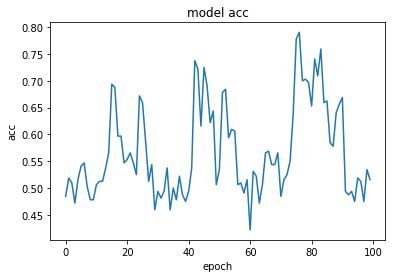

In [43]:
plt.plot(history_3.history['accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()

from 49% to 78% to 98% (almost or close enough SOTA )its the most significant jump made CNN models. 
clearly this model is the best .Gregory Koch et al experimented and fine tuned to this CNN model to extract best feature vectors that defines the image. 

In [ ]:
plt.plot(history_1.history['accuracy'], label = 'model_1')
plt.plot(history_2.history['accuracy'], label = 'model_2')
plt.plot(history_3.history['accuracy'], label = 'model_3')
plt.legend(['model_1','model_2' ,'model_3'], loc='upper left')
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()


In [53]:
def get_one_shot(data, num):
    total_size = sum(data['sizes'])
    prob = [size / total_size for size in data['sizes']]
    
    left_input = np.zeros((num, 105, 105, 1))
    right_input = np.zeros((num, 105, 105, 1))
    right_choices = []
    # select random alphabet with prob 
    #   (its number of characters / total number of characters)
    left_batik_name = np.random.choice(data['names'], p=prob)
    # select random character
    left_character_idx = np.random.randint(low = 0, high = data[left_batik_name]['size'])
    # select random example
    left_example_idx = np.random.randint(low = 0, high = 1) 
    left_choice = (left_batik_name, left_character_idx, left_example_idx)
    
    for idx in np.arange(num):
        if idx == 0:
            right_batik_name = left_batik_name
            right_character_idx = left_character_idx
        else:
            while True:
                # select random alphabet
                right_batik_name = np.random.choice(data['names'], p=prob)
                # select random character
                right_character_idx = np.random.randint(low = 0, high = data[right_batik_name]['size'])
                if left_batik_name != right_batik_name or left_character_idx != right_character_idx:
                    break
                    # select random example    
                right_example_idx = np.random.randint(low = 0, high = 1)
                left_input[idx, :, :, :] = data[left_batik_name][(left_character_idx, left_example_idx)].reshape((105, 105, 1))
                right_input[idx, :, :, :] = data[right_batik_name][(right_character_idx, right_example_idx)].reshape((105, 105, 1))
                right_choices.append((right_batik_name, right_character_idx, right_example_idx))
        return [left_input, right_input], left_choice, right_choices

In [63]:
def display_one_shot(model, data, num):
    pairs, left_choice, right_choices = get_one_shot(val_data, num)
    similarity_scores = model.predict(pairs)
    best_idx = np.argmax(similarity_scores)
    num = len(right_choices)
    size = math.ceil(math.sqrt(num))
    plt.figure(figsize=(10, 10))
    # left choice
    plt.subplot(size + 1, size + 1, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    batiks_name, character_idx, example_idx = left_choice
    plt.imshow(data[batiks_name][(character_idx, example_idx)], cmap='gray_r')
    
    # right choices
    for row in range(size):
        for col in range(size):
            idx = row * size + col
            if idx < num:
                batik_name, character_idx, example_idx = right_choices[idx]
                plt.subplot(size + 1, size + 1, (size + 1) * row + col + 2)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                if idx == best_idx:
                    if best_idx == 0:
                        color = 'green'
                    else:
                        color = 'red'
                else:
                    color = 'black'
            plt.title('{0:.4f}'.format(similarity_scores[row * size + col, 0]), color=color)
            plt.imshow(data[batik_name][(character_idx, example_idx)], cmap='gray_r')
    plt.show()

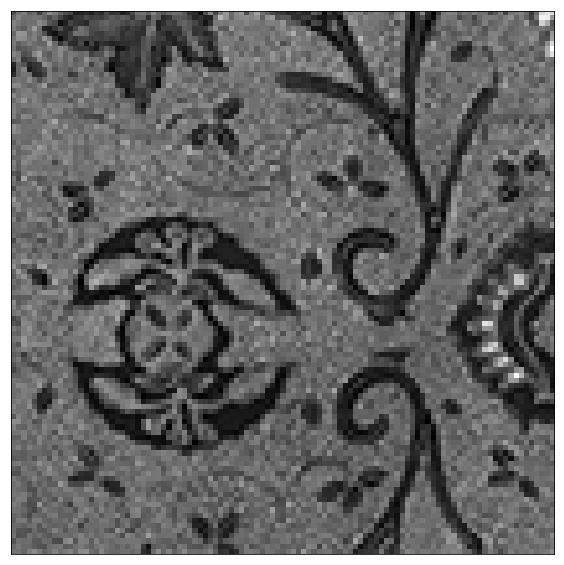

In [64]:
# using model_3 to predict 20 way one shot learning.
display_one_shot(model, val_data, 30)
# print(predict)